In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the dataset
df=sns.load_dataset('titanic')

## Overview of Data

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

There are 891 rows and 15 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
null=pd.DataFrame({'null_values':df.isnull().sum(),'null_value_percentage': round((df.isnull().sum()/len(df))*100,2)})

In [7]:
null

,null_values,null_value_percentage
survived,0,0.00
pclass,0,0.00
sex,0,0.00
age,177,19.87
sibsp,0,0.00
parch,0,0.00
fare,0,0.00
embarked,2,0.22
class,0,0.00
who,0,0.00


In [8]:
df.drop(columns=['embark_town'],axis=1,inplace=True)

In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,yes,True


In [10]:
df['deck'].value_counts(normalize=True,dropna=False)

deck
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: proportion, dtype: float64

As most of the values are null lets drop this column

In [11]:
df.drop(columns='deck',axis=1,inplace=True)

In [12]:
df.isnull().sum(
)

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [13]:
df['age'].median()

28.0

<Axes: ylabel='age'>

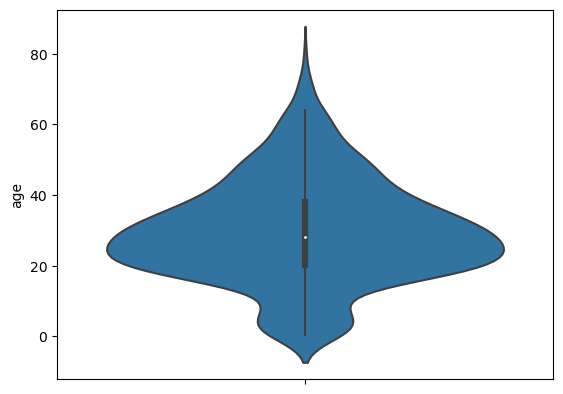

In [14]:
sns.violinplot(data=df,y=df['age'])

As there werent any huge deviation and median,mean and mode values arent that deviated. I would prefer mean to impute the null values.

In [15]:
mean_val=round(df['age'].mean())

In [16]:
df['age'].fillna(mean_val,inplace=True)

In [17]:
df['age'].isnull().sum()

0

In [18]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [19]:
df.dropna(axis=1,inplace=True)

In [20]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [21]:
df.shape

(891, 12)

In [22]:
cat_cols=df.select_dtypes(exclude=np.number).columns.to_list()

In [23]:
for i in cat_cols:
    print(df[i].value_counts())
    print(50*'-')

sex
male      577
female    314
Name: count, dtype: int64
--------------------------------------------------
class
Third     491
First     216
Second    184
Name: count, dtype: int64
--------------------------------------------------
who
man      537
woman    271
child     83
Name: count, dtype: int64
--------------------------------------------------
adult_male
True     537
False    354
Name: count, dtype: int64
--------------------------------------------------
alive
no     549
yes    342
Name: count, dtype: int64
--------------------------------------------------
alone
True     537
False    354
Name: count, dtype: int64
--------------------------------------------------


## Encoding

In [24]:
df['sex'].replace({'male':0,'female':1},inplace=True)

In [25]:
df['alive'].replace({'no':0,'yes':1},inplace=True)
df['who'].replace({'man':0,'woman':1,'child':2},inplace=True)
df['class'].replace({'Third':0,'First':1,'Second':2},inplace=True)

In [26]:
df.drop(columns=['alone','adult_male'],inplace=True)

In [27]:
df.shape

(891, 10)

In [28]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,alive
0,0,3,0,22.0,1,0,7.2500,0,0,0
1,1,1,1,38.0,1,0,71.2833,1,1,1
2,1,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,1,35.0,1,0,53.1000,1,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2,0,0
887,1,1,1,19.0,0,0,30.0000,1,1,1
888,0,3,1,30.0,1,2,23.4500,0,1,0
889,1,1,0,26.0,0,0,30.0000,1,0,1


## Feed the Data to the Neural Networks

In [29]:
! pip install tensorflow

In [30]:
from tensorflow import keras

In [31]:
from tensorflow.keras import layers

In [32]:
df.shape

(891, 10)

In [33]:
model=keras.Sequential([layers.Dense(units=10,activation='relu',input_shape=(9,)),
                       layers.Dense(units=15,activation='relu'),
                       layers.Dense(units=1,activation='sigmoid')
                       ])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y=df['survived']
x=df.drop('survived',axis=1)

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=22)

In [37]:
xtrain.shape

(668, 9)

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [39]:
%%time
training=model.fit(x=xtrain,y=ytrain,epochs=50,batch_size=316,validation_split=0.3)

Epoch 1/50
2/2 [==============================] - 0s 77ms/step - loss: 1.4958 - accuracy: 0.6831 - val_loss: 1.6008 - val_accuracy: 0.6915
Epoch 2/50
2/2 [==============================] - 0s 12ms/step - loss: 1.3838 - accuracy: 0.6852 - val_loss: 1.5006 - val_accuracy: 0.6866
Epoch 3/50
2/2 [==============================] - 0s 13ms/step - loss: 1.2894 - accuracy: 0.6874 - val_loss: 1.4073 - val_accuracy: 0.6915
Epoch 4/50
2/2 [==============================] - 0s 13ms/step - loss: 1.2107 - accuracy: 0.6981 - val_loss: 1.3213 - val_accuracy: 0.6915
Epoch 5/50
2/2 [==============================] - 0s 13ms/step - loss: 1.1391 - accuracy: 0.7002 - val_loss: 1.2421 - val_accuracy: 0.6866
Epoch 6/50
2/2 [==============================] - 0s 13ms/step - loss: 1.0687 - accuracy: 0.6981 - val_loss: 1.1677 - val_accuracy: 0.6915
Epoch 7/50
2/2 [==============================] - 0s 13ms/step - loss: 1.0112 - accuracy: 0.6981 - val_loss: 1.0990 - val_accuracy: 0.6866
Epoch 8/50
2/2 [===========

In [40]:
# Print the accuracy
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 69.49%


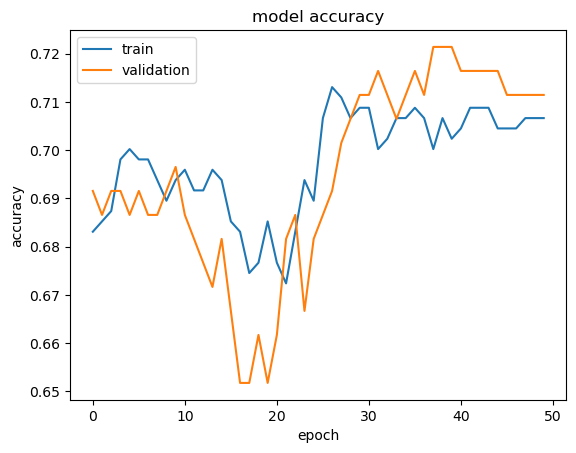

In [44]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()